## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


### Find no.of samples are there in training and test datasets

In [0]:
x_train.shape # 60K in training

(60000, 28, 28)

In [0]:
x_test.shape # 10K in test

(10000, 28, 28)

### Find dimensions of an image in the dataset

In [0]:
# from above dimension is 28*28
x_train[0].shape

(28, 28)

In [0]:
x_test[:0,1]

array([], shape=(0, 28), dtype=uint8)

In [0]:
from keras import backend as K
x_train = K.cast_to_floatx(x_train)
x_train.dtype

dtype('float32')

In [0]:
from keras import backend as K
x_test = K.cast_to_floatx(x_train)
x_test.dtype

dtype('float32')

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
import keras
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

#y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
#y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
print('Train min=%.3f, max=%.3f' % (x_train.min(), x_train.max()))
print('Test min=%.3f, max=%.3f' % (x_test.min(), x_test.max()))



Train min=0.000, max=255.000
Test min=0.000, max=255.000


In [0]:
x_train[0]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,  13.,  73.,   0.,   0.,   1.,   4.,   0.,
          0.,   0.,   0.,   1.,   1.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   3.,   0.,  36., 136., 127.,  62.,  54.,   0.,   0.,   0.,
          1.,   3.,   4.,   0.,   0.,   3.],
       [  0.,   0.,   0.,   0.,   0

In [0]:

x_train = x_train/255
x_test = x_test/255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:

# reshape dataset to have a single channel
width, height, channels = x_train.shape[1], x_train.shape[2], 1
x_train = x_train.reshape((x_train.shape[0], width, height, channels))
x_test = x_test.reshape((x_test.shape[0], width, height, channels))


In [0]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
x_test.shape

(60000, 28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
#from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Reshape
from keras.layers import Dropout

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
# define model
model = Sequential()
#model.add(Reshape((784,), input_shape=(28, 28, 1)))
#model.add(Convolution2D(32, 3, 3))

model.add(Conv2D(32, (3, 3), activation='relu'))
#model.add(Flatten())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


#model.add(MaxPooling2D((2, 2)))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D((2, 2)))

#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [0]:
model.fit(x_train, y_train, epochs=10 )




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





60000/60000 [==============================] - 25s 419us/step - loss: 0.3781 - acc: 0.8644
Epoch 2/10
60000/60000 [==============================] - 18s 300us/step - loss: 0.2299 - acc: 0.9161
Epoch 3/10
60000/60000 [==============================] - 18s 298us/step - loss: 0.1695 - acc: 0.9369
Epoch 4/10
60000/60000 [==============================] - 18s 299us/step - loss: 0.1192 - acc: 0.9556
Epoch 5/10
60000/60000 [==============================] - 18s 299us/step - loss: 0.0786 - acc: 0.9717
Epoch 6/10
60000/60000 [==============================] - 18s 299us/step - loss: 0.0522 - acc: 0.9817
Epoch 7/10
60000/60000 [==============================] - 18s 297us/step - loss: 0.0381 - acc: 0.9868
Epoch 8/10
60000/60000 [==============================] - 18s 298us/step - loss: 0.0275 - acc: 0.9905
Epoch 9/10
60000/60000 [==============================] - 18s 297us/step - loss

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
# define model
model1 = Sequential()


model1.add(Conv2D(32, (3, 3), activation='relu'))

model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
#model1.add(MaxPooling2D((2, 2)))
 # Dropout
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(10, activation='softmax'))


#model.add(MaxPooling2D((2, 2)))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D((2, 2)))

#Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [0]:
model1.fit(x_train, y_train, epochs=10 )



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/10
60000/60000 [==============================] - 18s 294us/step - loss: 0.4022 - acc: 0.8556
Epoch 2/10
60000/60000 [==============================] - 17s 288us/step - loss: 0.2649 - acc: 0.9022
Epoch 3/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.2181 - acc: 0.9191
Epoch 4/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.1823 - acc: 0.9319
Epoch 5/10
60000/60000 [==============================] - 17s 288us/step - loss: 0.1551 - acc: 0.9423
Epoch 6/10
60000/60000 [==============================] - 17s 287us/step - loss: 0.1272 - acc: 0.9512
Epoch 7/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.1105 - acc: 0.9572
Epoch 8/10
60000/60000 [==============================] - 17s 288us/step - loss: 0.0975 - acc: 0.9635
Epoch 9/10
60000/60000 [==============================] - 17s 291us

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

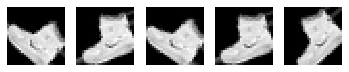

In [0]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [0]:
  # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
    callback_list = [early_stopping]

In [0]:

train_iterator = datagen.flow(x_train, y_train,batch_size=32)

model1.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2826 - acc: 0.8943
Epoch 2/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2713 - acc: 0.8998
Epoch 3/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2660 - acc: 0.9020
Epoch 4/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2614 - acc: 0.9032
Epoch 5/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2558 - acc: 0.9057


###  Report the final train and validation accuracy

In [0]:
loss_and_metrics = model1.evaluate(x_train, y_train)
print(loss_and_metrics)

60000/60000 [==============================] - 5s 86us/step
[0.15763493590702612, 0.941]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
import keras
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [0]:
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
xtrain.shape

(50000, 32, 32, 3)

In [0]:
xtest.shape

(10000, 32, 32, 3)

In [0]:
from keras import backend as K
xtrain = K.cast_to_floatx(xtrain)
xtrain.dtype

dtype('float32')

In [0]:
xtrain[0]

array([[[ 59.,  62.,  63.],
        [ 43.,  46.,  45.],
        [ 50.,  48.,  43.],
        ...,
        [158., 132., 108.],
        [152., 125., 102.],
        [148., 124., 103.]],

       [[ 16.,  20.,  20.],
        [  0.,   0.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [123.,  88.,  55.],
        [119.,  83.,  50.],
        [122.,  87.,  57.]],

       [[ 25.,  24.,  21.],
        [ 16.,   7.,   0.],
        [ 49.,  27.,   8.],
        ...,
        [118.,  84.,  50.],
        [120.,  84.,  50.],
        [109.,  73.,  42.]],

       ...,

       [[208., 170.,  96.],
        [201., 153.,  34.],
        [198., 161.,  26.],
        ...,
        [160., 133.,  70.],
        [ 56.,  31.,   7.],
        [ 53.,  34.,  20.]],

       [[180., 139.,  96.],
        [173., 123.,  42.],
        [186., 144.,  30.],
        ...,
        [184., 148.,  94.],
        [ 97.,  62.,  34.],
        [ 83.,  53.,  34.]],

       [[177., 144., 116.],
        [168., 129.,  94.],
        [179., 1

In [0]:
xtrain= xtrain/255

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
# This will do preprocessing and realtime data augmentation:
datagen_C = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.02,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.02,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images



### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
datagen_C.fit(xtrain)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

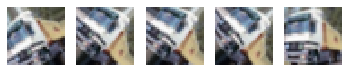

In [0]:
from matplotlib import pyplot as plt
gen = datagen.flow(xtrain[1:2], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()